Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Part 1 - Data Preprocessing

  Preprocessing the Training set

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory( r"D:\C ROOT DATA\Desktop\dogs_cats\training_set",
                                                     target_size=(64, 64),
                                                     batch_size=32,
                                                     class_mode='binary')


Found 8000 images belonging to 2 classes.


Preprocessing the Test set

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory( r"D:\C ROOT DATA\Desktop\dogs_cats\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Part 2 - Building the CNN

Initialising the CNN

In [16]:
cnn = tf.keras.models.Sequential()

Step 1 - Convolution

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\Admin\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 2 - Pooling

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolutional layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Step 3 - Flattening

In [20]:
cnn.add(tf.keras.layers.Flatten())

Step 4 - Full Connection

In [21]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Step 5 - Output Layer

In [22]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Part 3 - Training the CNN

Compiling the CNN

In [23]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set


In [24]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

C:\Users\Admin\tfenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 109s 433ms/step - accuracy: 0.5405 - loss: 0.7172 - val_accuracy: 0.6115 - val_loss: 0.6502
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.6544 - loss: 0.6269 - val_accuracy: 0.6985 - val_loss: 0.5835
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6883 - loss: 0.5814 - val_accuracy: 0.7010 - val_loss: 0.5730
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7330 - loss: 0.5295 - val_accuracy: 0.7500 - val_loss: 0.5217
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7413 - loss: 0.5256 - val_accuracy: 0.7660 - val_loss: 0.5100
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7543 - loss: 0.4998 - val_accuracy: 0.7520 - val_loss: 0.5300
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.7630 - loss: 0.4845 - val_accuracy: 0.7605 - val_loss: 0.5041
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7731 - loss: 0.47

Part 4 - Making a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
✅ Selected Image: D:\C ROOT DATA\Desktop\dogs_cats\single_prediction\cat_dog8.jpg
🔍 Model Prediction: dog


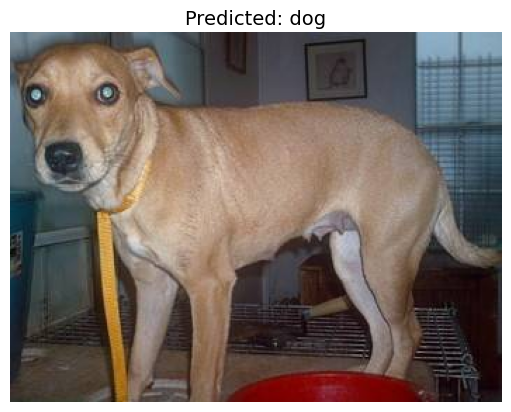

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image

image_path = r"D:\C ROOT DATA\Desktop\dogs_cats\single_prediction\cat_dog8.jpg"

test_image = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

result = cnn.predict(img_array)

prediction = 'dog' if result[0][0] > 0.5 else 'cat'

print(f"✅ Selected Image: {image_path}")
print(f"🔍 Model Prediction: {prediction}")

img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Predicted: {prediction}", fontsize=14)
plt.axis('off')
plt.show()
